In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)

In [29]:
# Carico il dataset con le features
df = pd.read_csv('features.csv')

# Inserisco in ciascuna riga del dataframe delle features i pesi ottimi (scaricati nel file get_portfolio_weights.ipynb) della settimana successiva (che saranno la variabile da predire)
next_week_optimal_weights= pd.read_csv("df_optimal_weights.csv")
next_week_optimal_weights = next_week_optimal_weights.rename(columns=lambda x: "next_week_opt_weight_" + x)
next_week_optimal_weights= next_week_optimal_weights[1:].copy()
next_week_optimal_weights.loc[len(next_week_optimal_weights)+1] = [np.nan] * next_week_optimal_weights.shape[1]
next_week_optimal_weights.index = pd.RangeIndex(start=0, stop=len(next_week_optimal_weights), step=1)
df= pd.concat([df, next_week_optimal_weights], axis=1)
df = df.dropna()

# Scelgo la dimensione del train set
train_size = int(len(df) * 0.70)

# Divido il dataset in training e testing set
X_train = df.drop(columns=["next_week_opt_weight_EXV1.DE","next_week_opt_weight_EXV2.DE","next_week_opt_weight_EXV3.DE","next_week_opt_weight_EXV5.DE","next_week_opt_weight_EXV6.DE"]).iloc[:train_size]
y_train = df[["next_week_opt_weight_EXV1.DE","next_week_opt_weight_EXV2.DE","next_week_opt_weight_EXV3.DE","next_week_opt_weight_EXV5.DE","next_week_opt_weight_EXV6.DE"]].iloc[:train_size]
X_test = df.drop(columns=["next_week_opt_weight_EXV1.DE","next_week_opt_weight_EXV2.DE","next_week_opt_weight_EXV3.DE","next_week_opt_weight_EXV5.DE","next_week_opt_weight_EXV6.DE"]).iloc[train_size:]
y_test = df[["next_week_opt_weight_EXV1.DE","next_week_opt_weight_EXV2.DE","next_week_opt_weight_EXV3.DE","next_week_opt_weight_EXV5.DE","next_week_opt_weight_EXV6.DE"]].iloc[train_size:]

In [30]:
# Starto il modello
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Addestro il modello
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Faccio previsioni sul test set
y_pred = rf_model.predict(X_test)

# Calcolo l'errore quadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Errore Quadratico Medio: {mse}')

Errore Quadratico Medio: 0.03151211507692307


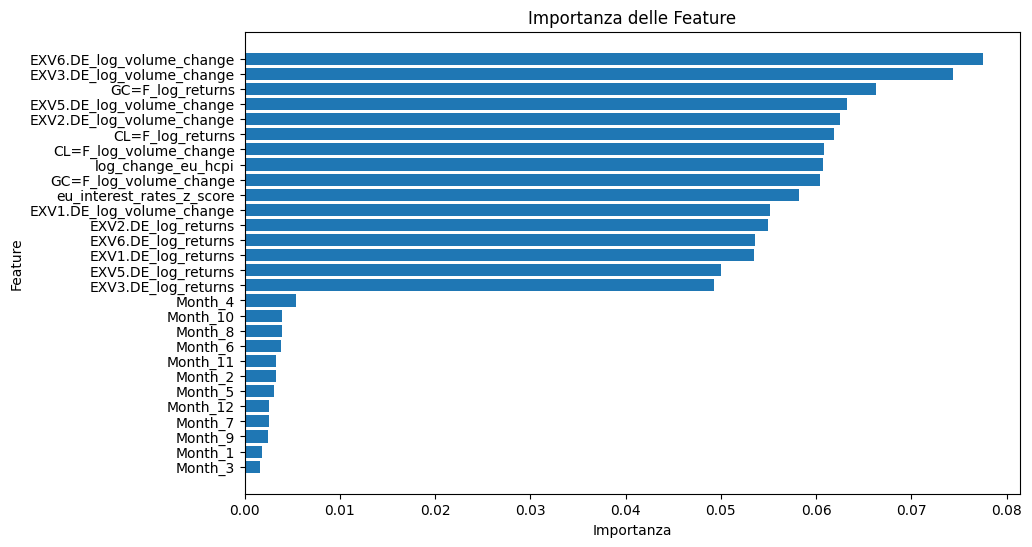

In [32]:
# Estraggo l'importanza data alle features
feature_importances = rf_model.feature_importances_

# Creo un df con le varie importanze
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizzo graficamente
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.title('Importanza delle Feature')
plt.gca().invert_yaxis()
plt.show()

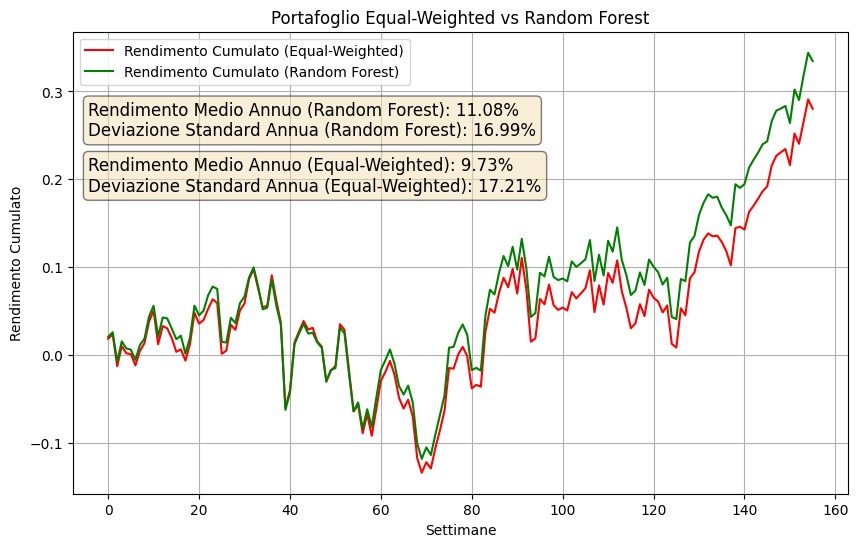

In [34]:
# Importo le funzioni che calcolano le performance di un portafoglio
from portfolio_performance_functions import get_weekly_returns, calculate_portfolio_performance, compare_portfolio_performance

weekly_returns= get_weekly_returns(pd.read_csv("stocks_data_adj_close.csv"))
compare_portfolio_performance(weekly_returns[int(len(weekly_returns) * 0.7):], y_pred,  pd.read_csv("df_equally_weighted_portfolio_weights.csv").to_numpy()[int(len(weekly_returns) * 0.7):], plot_title="Portafoglio Equal-Weighted vs Random Forest", savefig_name="random_forest_results.png", nome_p1= "Equal-Weighted", nome_p2= "Random Forest")